In [ ]:
# https://github.com/opendatalab/PDF-Extract-Kit/tree/main

## <mark> This notebook should contain code for below tasks:

1. Extract raw text from PDF files (PyMuPDF)
2. Extract raw text from Image using OCR (Tessearct)
3. Extract tables from PDF (Tabula)
4. Extract metada information from PDF

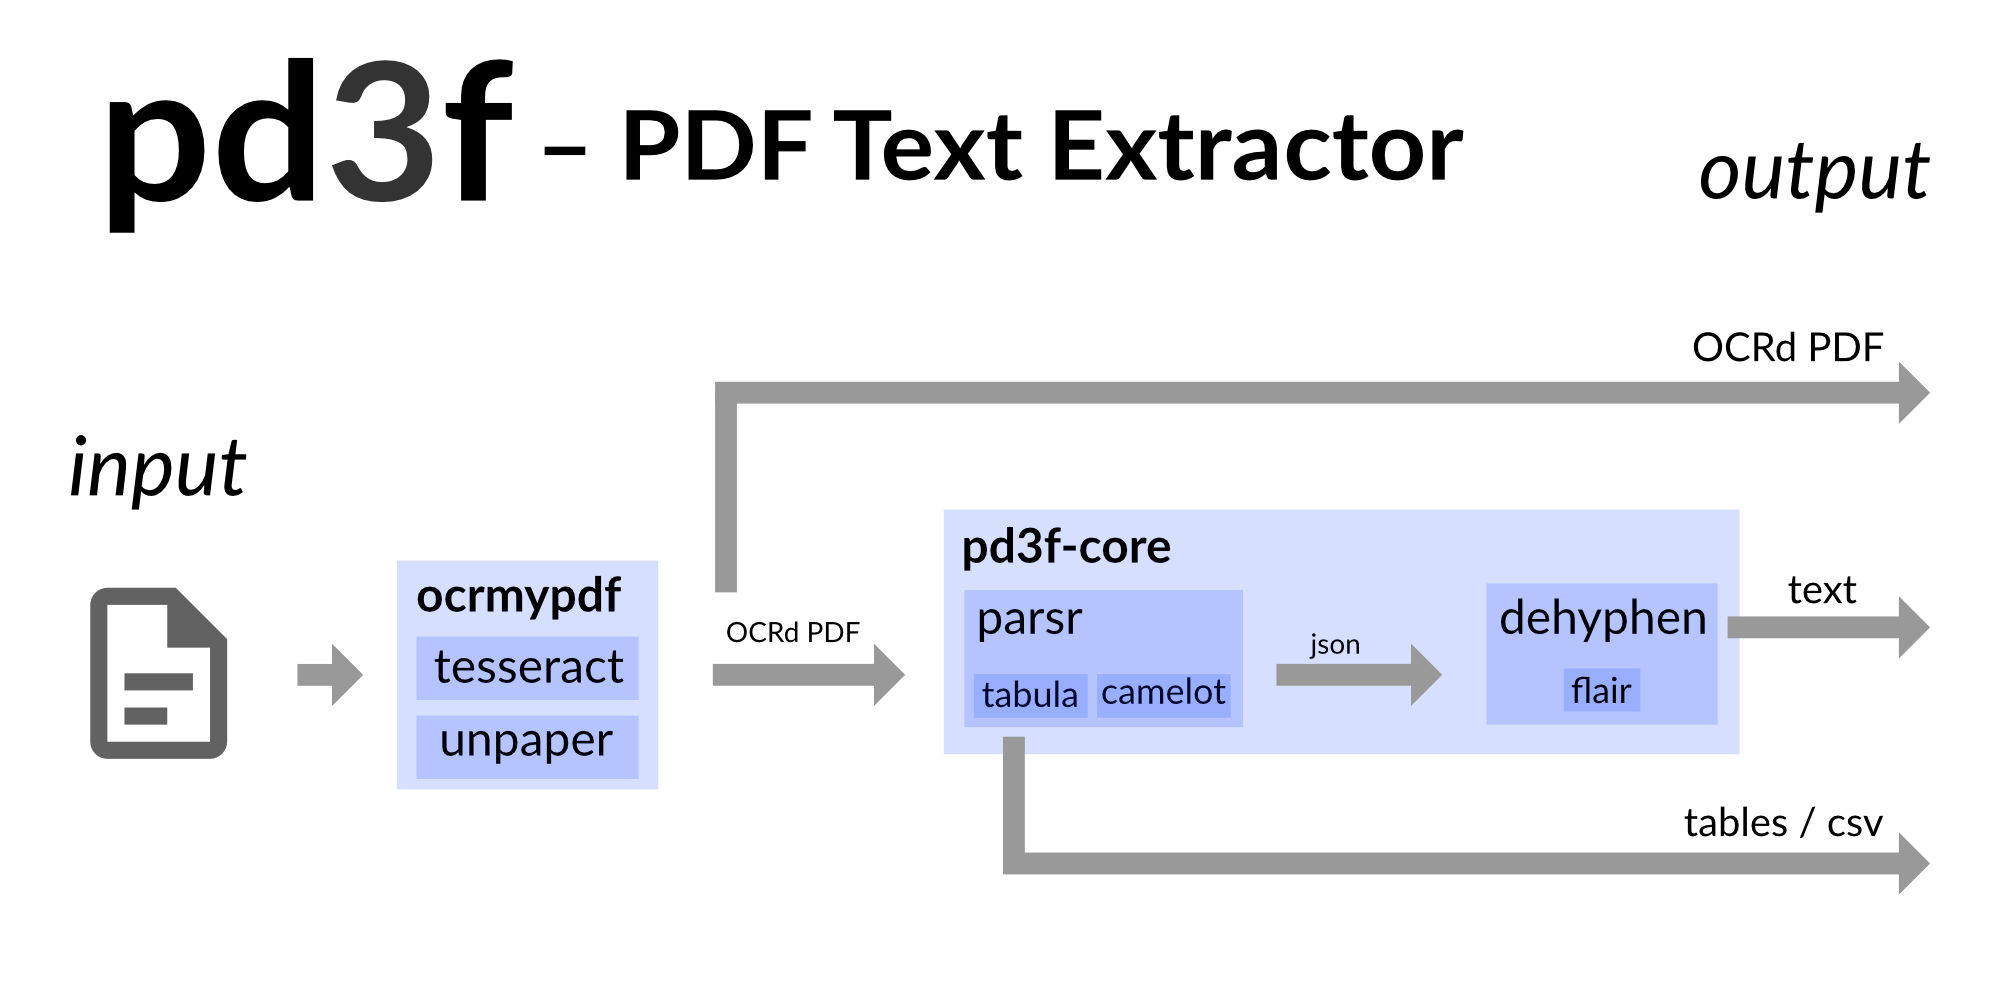

<mark> Install necessary packages

In [ ]:
!pip install streamlit pdfminer==20191125 pdf2image pytesseract poppler-utils pypdf tabula-py pyodbc PyMuPDF
# tesseract-ocr
# tesseract-ocr-spa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.2 MB/s eta 0:00:00
  Created wheel for pdfminer: filename=pdfminer-20191125-py3-none-any.whl size=6140075 sha256=261e936d30a6c1ee288a7b0d830b7e1b2dbbecfab8724e9b0dff92233c53721f
  Stored in 

In [ ]:
## Since py-tabula needs java on machine
!java -version

openjdk version "11.0.25" 2024-10-15
OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


<mark> Import necessary packages and mount the drive

In [ ]:
from zipfile import ZipFile
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO
import base64

import warnings
warnings.simplefilter("ignore")

import pdf2image
from PIL import Image
import pytesseract
from pytesseract import Output, TesseractError

import tabula

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datasets_path = '/content/drive/MyDrive/ml_datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<mark> Extract text from PDF

https://pymupdf.readthedocs.io/en/latest/

In [ ]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 48.4 MB/s eta 0:00:00


In [ ]:
import pymupdf
doc = pymupdf.open(f"{datasets_path}/pfizer_celebrex.pdf")
text = ''
for page in doc:
  text += page.get_text() # get plain text encoded as UTF-8

print(len(text))
text.split('\n')[0:10]

24318


['PhRMA Web Synopsis',
 'Protocol A3191139 – 26 February 2009 - Final',
 'PFIZER CONFIDENTIAL',
 'Page 1',
 'PFIZER INC.',
 'These results are supplied for informational purposes only.',
 'Prescribing decisions should be made based on the approved package insert.',
 'For publications based on this study, see associated bibliography.',
 'PROPRIETARY DRUG NAME®/GENERIC DRUG NAME: Celebrex®/Celecoxib',
 'THERAPEUTIC AREA AND FDA APPROVED INDICATIONS:  See USPI.']

In [ ]:
doc = pymupdf.open(f"{datasets_path}/pfizer_celebrex.pdf")
header = "Header"  # text in header
footer = "Page %i of %i"  # text in footer
for page in doc:
    page.insert_text((50, 50), header)  # insert header
    page.insert_text(  # insert footer 50 points above page bottom
        (50, page.rect.height - 50),
        footer % (page.number + 1, doc.page_count),
    )

page.get_text()
# page.get_images()
# page.get_textpage().extractText()
# page.find_tables().tables

'PhRMA Web Synopsis\nProtocol A3191139 – 26 February 2009 - Final\nPFIZER CONFIDENTIAL\nPage 10\nTable S6. Summary of Subjects with Grade 3 or 4 Laboratory Findings\nExemestane Arm\n(Exemestane Alone)\nCombination Arm  \n(Exemestane + Celecoxib)\nNumber (%) Subjects\nGrade 3\nGrade 4\nGrade 3\nGrade 4\nHematology\nPlatelet count\n0\n0\n1 (2.0)\n0\nNeutrophils\n2 (4.1)\n0\n0 1 (2.0)\n0\nLymphocytes\n2 (4.1)\n0\n0\n0\nBlood Chemistry\nAlkaline phosphatase\n3 (6.5)\n0\n2 (4.1)\n0\nAST\n0\n0\n2 (4.1)\n0\nGGT\n7 (16.3)\n0\n5 (10.9)\n1 (2.2)\nCalcium\n0\n0\n1 (2.2)\n0\nTotal bilirubin\n0\n1 (2.1)\n0\n0\nAST = aspartate aminotransferase; GGT = gamma glutamyl transferase\nCONCLUSIONS:\nThe demographic characteristics were similar in both arms and the 2 groups appeared \nbalanced with respect to the prognostic factors.  The majority of subjects in both groups were \naffected by visceral metastases, a factor known to be associated with a worse prognosis and a \npoor outcome.\nThe duration of cli

<mark> # Extract Tables from PDFs

https://tabula-py.readthedocs.io/en/latest/getting_started.html

In [ ]:
help(tabula.read_pdf)

Help on function read_pdf in module tabula.io:

read_pdf(input_path: Union[IO, str, os.PathLike], output_format: Optional[str] = None, encoding: str = 'utf-8', java_options: Optional[List[str]] = None, pandas_options: Optional[Dict[str, Any]] = None, multiple_tables: bool = True, user_agent: Optional[str] = None, use_raw_url: bool = False, pages: Union[str, int, Iterable[int], NoneType] = None, guess: bool = True, area: Union[Iterable[float], Iterable[Iterable[float]], NoneType] = None, relative_area: bool = False, lattice: bool = False, stream: bool = False, password: Optional[str] = None, silent: Optional[bool] = None, columns: Optional[Sequence[float]] = None, relative_columns: bool = False, format: Optional[str] = None, batch: Optional[str] = None, output_path: Optional[str] = None, force_subprocess: bool = False, options: str = '') -> Union[List[pandas.core.frame.DataFrame], Dict[str, Any]]
    Read tables in PDF.
    
    Args:
        input_path (str, path object or file-like ob

In [ ]:
pdf_path = f"{datasets_path}/pfizer_celebrex.pdf"

dfs = tabula.read_pdf(pdf_path, stream=True, pages="all")

# read_pdf returns list of DataFrames
print(len(dfs))

if len(dfs)>0:
  display(dfs[0].head(3))

Dec 04, 2024 1:56:22 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



3


,Unnamed: 0,Exemestane Arm,Combination Arm
0,NaN,(Exemestane Alone),(Exemestane + Celecoxib)
1,NaN,N=53,N=53
2,Number (%) Subjects with:,Any Event Treatment Related,Any Event Treatment Related


In [ ]:
##Read partial area of PDF
'''
area (iterable of float, iterable of iterable of float, optional):
    Portion of the page to analyze(top,left,bottom,right).
    Default is entire page.

    Note:
        If you want to use multiple area options and extract in one table, it
        should be better to set ``multiple_tables=False``
'''
dfs = tabula.read_pdf(pdf_path, area=[126, 149, 212, 462], pages='all')
print(len(dfs))

Dec 04, 2024 1:59:57 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



10


In [ ]:
dfs = tabula.read_pdf(pdf_path, stream=True, pages="8", area=[126, 149, 212, 462])
print(len(dfs))
display(dfs[0].head(50))

Dec 04, 2024 2:16:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



1


,Unnamed: 0,Exemestane Arm,Combin
0,NaN,(Exemestane Alone),(Exemestan
1,NaN,N=53,N
2,ubjects with:,Any Event Treatment Related,Any Event
3,NaN,45 (84.9) 13 (24.5),43 (81.1)


In [ ]:
dfs = tabula.read_pdf(pdf_path, columns=[47, 147, 256, 310, 375, 431, 504], guess=False, pages='8')
df = dfs[0].drop(["Unnamed: 0"], axis=1)
df.head()

## So here, page will be divided into columns, first column being at 47 from left, second at 147 from left and so on: columns=[47, 147, 256, 310, 375, 431, 504]

Dec 04, 2024 2:18:21 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



,090177e18,09588e0\Approved\,Approved,On: 17-Mar-,2009 02:42,Unnamed: 1,Unnamed: 2
0,PhRMA Web,Synopsis,NaN,NaN,NaN,NaN,NaN
1,Protocol A319,1139 – 26 February 2009 -,Final,NaN,NaN,NaN,NaN
2,arms) their m,ost severe AE was Gr,ade 3 and 4,", respectively",. None of t,he Grade 4 AEs,that
3,were reporte,d were considered to b,e treatment,-related.,NaN,NaN,NaN
4,Table S4.,Summary of Frequen,cy of Treat,ment Emerg,ent Advers,e Events,NaN


In [ ]:
# read pdf as JSON
jsontab = tabula.read_pdf(pdf_path, pages="8", output_format="json")
jsontab

Dec 04, 2024 2:20:18 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[{'extraction_method': 'stream',
  'top': 136.0,
  'left': 86.0,
  'width': 463.0,
  'height': 143.0,
  'right': 549.0,
  'bottom': 279.0,
  'data': [[{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 140.72,
     'left': 262.2,
     'width': 74.82498168945312,
     'height': 6.639999866485596,
     'text': 'Exemestane Arm'},
    {'top': 140.72,
     'left': 425.76,
     'width': 83.48999786376953,
     'height': 6.639999866485596,
     'text': 'Combination Arm'}],
   [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 152.24,
     'left': 256.32,
     'width': 86.2615966796875,
     'height': 6.639999866485596,
     'text': '(Exemestane Alone)'},
    {'top': 152.24,
     'left': 409.92,
     'width': 109.99996185302734,
     'height': 6.639999866485596,
     'text': '(Exemestane + Celecoxib)'}],
   [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 163.76,
     'left': 287.52,
     'width': 25.410

In [ ]:
##Convert to tsv
tabula.convert_into(pdf_path, "test.tsv", output_format="tsv", stream=True, pages='8')
!cat test.tsv

Dec 04, 2024 2:22:09 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



""	Exemestane Arm	Combination Arm
""	(Exemestane Alone)	(Exemestane + Celecoxib)
""	N=53	N=53
Number (%) Subjects with:	Any Event Treatment Related	Any Event Treatment Related
At least 1 AE	45 (84.9) 13 (24.5)	43 (81.1) 15 (28.3)
Highest grade of AE:		
Grade 1	6 (11.3) 4 (7.5)	15 (28.3) 9 (17.0)
Grade 2	25 (47.2) 8 (15.1)	13 (24.5) 4 (7.5)
Grade 3	12 (22.6) 1 (1.9)	9 (17.0) 2 (3.8)
Grade 4	2 (3.8) 0	6 (11.3) 0


In [ ]:
##Convert to csv
tabula.convert_into(pdf_path, "test.csv", output_format="csv", stream=True, pages='8')
!cat test.csv

Dec 04, 2024 2:22:40 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



"",Exemestane Arm,Combination Arm
"",(Exemestane Alone),(Exemestane + Celecoxib)
"",N=53,N=53
Number (%) Subjects with:,Any Event Treatment Related,Any Event Treatment Related
At least 1 AE,45 (84.9) 13 (24.5),43 (81.1) 15 (28.3)
Highest grade of AE:,,
Grade 1,6 (11.3) 4 (7.5),15 (28.3) 9 (17.0)
Grade 2,25 (47.2) 8 (15.1),13 (24.5) 4 (7.5)
Grade 3,12 (22.6) 1 (1.9),9 (17.0) 2 (3.8)
Grade 4,2 (3.8) 0,6 (11.3) 0


In [ ]:
'''
Use lattice mode for more accurate extraction for spreadsheet style tables
If your tables have lines separating cells, you can use lattice option. By default, tabula-py sets guess=True, which is the same behavior for default of tabula app. If your tables don't have separation lines, you can try stream option.

As it mentioned, try tabula app before struglling with tabula-py option. Or, PDFplumber can be an alternative since it has different extraction strategy.
'''

## Here no spreadsheet like tables present
dfs = tabula.read_pdf(
    f"{datasets_path}/clinical_trial_laypersons.pdf",
    pages="1",
    lattice=True,
    # pandas_options={"header": [0, 1]}, ##To give names to headers
    area=[0, 0, 50, 100],
    relative_area=True,
    multiple_tables=False,
)
print(len(dfs))

## Here spreadsheet like tables are present
dfs = tabula.read_pdf(f"{datasets_path}/clinical_trial_laypersons.pdf", pages='1', lattice=True, relative_area=True)
print(len(dfs))

dfs[0].head()


0
2


,Document history:,Unnamed: 0
0,Date of discussion of the revised version by t...,5 February 2018
1,Date of publication,22 February 2018
2,Date of entry into force:,OnapplicationoftheClinical\rTrialsRegulation(E...
3,Supersedes:,Version 1 of 26 January 2017
4,Changes compared to superseded version 1.0,UpdatetoAnnex1Section7\rregarding secondary en...


In [ ]:
## Use this cell to insert resulting dataframe into sql server
# import pyodbc
# import pandas as pd

# df = pd.read_csv(csv_path)

# server = 'servername'
# database = 'dbname'
# username = 'username'
# password = 'password'
# cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
# cursor = cnxn.cursor()

# ## Insert Dataframe into SQL Server:
# for index, row in df.iterrows():
#      cursor.execute("INSERT INTO HumanResources.DepartmentTest (DepartmentID,Name,GroupName) values(?,?,?)", row.DepartmentID, row.Name, row.GroupName)
# cnxn.commit()
# cursor.close()